# Sprint 8: Explorar las conexiones de datos con correlaciones


## 🎯 Objetivo de la sesión
Al finalizar la clase, podrás:
1. Diferenciar **Pearson** y **Spearman** y elegir cuál usar según el tipo de relación.
2. Interpretar correctamente el resultado.
3. Medir asociación entre distintos tipos de variables:
   - Numérica vs Numérica (Pearson / Spearman)
   - Categórica binaria vs Numérica (Point-biserial)
   - Categórica vs Categórica (Cramér’s V)
4. Usar visualizaciones para validar correlaciones (scatter, regplot, box/strip, tablas en heatmap).
5. Aplicar funciones simples que automaticen el análisis según el tipo de variables.

---

## 🗓️ Agenda
1. **Repaso express**: correlación ≠ causalidad + Simpson (alerta temprana).
2. **Teoría**
6. **Ejercicios y práctica** 

## Pearson vs Spearman

#### ✅ Pearson (r)
**Qué mide:** fuerza y dirección de una relación **lineal** entre dos variables numéricas.

**Úsalo cuando:**
- La nube de puntos se parece a una línea (aunque tenga ruido).
- Quieres medir “qué tan bien una recta describe la relación”.

**Señales de advertencia:**
- **Outliers**: un par de puntos extremos puede “secuestrar” el resultado.
- **Relación no lineal**: puede dar `r≈0` aunque exista patrón claro.

![](https://www.probabilidadyestadistica.net/wp-content/uploads/2022/02/tipos-correlacion-1024x658.png)

---

#### ✅ Spearman (ρ)
**Qué mide:** fuerza y dirección de una relación **monótona** (creciente o decreciente), usando **rangos**.

**Úsalo cuando:**
- Hay relación creciente/decreciente pero con curva (ej. log, exponencial).
- Hay outliers o escalas raras.
- Tus datos son ordinales (ranking, niveles, escalas tipo Likert).

**Ventaja:** si el patrón es monótono, Spearman suele capturarlo aunque no sea lineal.

![](https://www.questionpro.com/blog/wp-content/uploads/2025/10/spearmans-rank-correlation-coefficient.jpg)

<div style="display:flex; gap:16px; align-items:stretch; justify-content:space-between; flex-wrap:nowrap;">
  <figure style="flex:1; margin:0; border:1px solid #e5e7eb; border-radius:12px; overflow:hidden; background:#fff;">
    <img
      src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdrHUi4D34UGFnfKuN0r1TdaoRQYxJPwBZKw&s"
      alt="Imagen 1"
      style="width:100%; height:220px; object-fit:contain; display:block; padding:12px;"
    />
  </figure>

  <figure style="flex:1; margin:0; border:1px solid #e5e7eb; border-radius:12px; overflow:hidden; background:#fff;">
    <img
      src="https://www.analytixlabs.co.in/wp-content/uploads/2024/06/8.jpg"
      alt="Imagen 2"
      style="width:100%; height:220px; object-fit:contain; display:block; padding:12px;"
    />
  </figure>

  <figure style="flex:1; margin:0; border:1px solid #e5e7eb; border-radius:12px; overflow:hidden; background:#fff;">
    <img
      src="https://fiveable.me/_next/image?url=https%3A%2F%2Fstorage.googleapis.com%2Fstatic.prod.fiveable.me%2Fsearch-images%252F%2522Pearson_and_Spearman_correlation_coefficients_comparison_infographic_linear_relationship_statistics_visual_guide%2522-600px-Spearman_fig4.svg.png&w=3840&q=75"
      alt="Imagen 3"
      style="width:100%; height:220px; object-fit:contain; display:block; padding:12px;"
    />
  </figure>
</div>


## 📌 Correlación punto biserial (Point-biserial)

### ¿En qué consiste?
La **correlación punto biserial** mide la relación entre:
- **Una variable numérica continua** (ej. `tip`, `salary`, `score`)
- **Una variable categórica binaria** (dos grupos) (ej. `smoker`: Yes/No, `passed`: 0/1)

Responde a preguntas tipo:
- “¿Las propinas son diferentes entre fumadores y no fumadores?”
- “¿Los que aprobaron tienen puntajes más altos que los que no?”

### ¿Cómo se interpreta?
- El coeficiente va de **-1 a 1** (igual que Pearson).
- **Signo (+ / -)** depende de cómo codifiques la categoría (qué grupo sea 1 y cuál sea 0).
  - Si codificas `Yes=1` y el coeficiente es positivo, significa que el grupo `Yes` tiende a tener valores **más altos** en la variable numérica.
- **Magnitud |r|** indica fuerza de asociación (misma lectura que Pearson).

![](https://www.researchgate.net/publication/381465484/figure/fig3/AS:11431281275939866@1725526679170/Point-biserial-correlation-r-pb-between-the-variables-Basement-and-Concrete-qty-The.jpg)

### ¿Cuándo se usa?
✅ Úsala cuando:
- Tienes una variable **binaria real** (dos grupos).
- Quieres cuantificar la diferencia entre grupos en una **variable numérica**.

⚠️ Cuidados:
- Si la distribución numérica tiene **outliers**, el valor puede distorsionarse.
- Si la variable “binaria” realmente es una simplificación mala (ej. recortar una escala), la interpretación se vuelve débil.


---

## 📌 Cramér’s V (asociación categórica vs categórica)

### ¿En qué consiste?
**Cramér’s V** mide la **fuerza de asociación** entre **dos variables categóricas**, por ejemplo:
- `sex` vs `survived`
- `payment_method` vs `churn`
- `brand` vs `region`

Se basa en una **tabla de contingencia** y en la prueba **chi-cuadrado (χ²)**:
- Primero se calcula qué tan distinta es la tabla observada vs lo que esperaríamos si fueran independientes.
- Luego se normaliza para obtener un valor fácil de interpretar: **V**.

### ¿Cómo se interpreta?
- Rango: **0 a 1**
  - `0` → sin asociación (independencia aproximada)
  - `1` → asociación muy fuerte
- No tiene signo (no es “positiva/negativa”) porque en categóricas no hay dirección tipo “sube/baja”.

---


## Ejemplos:

In [1]:
# =========================
# 0) Setup
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Usaremos datasets de seaborn (listos para clase)
tips = sns.load_dataset("tips")   # numéricas + categóricas (propina, cuenta, día, fumador, etc.)
penguins = sns.load_dataset("penguins") # numéricas + categóricas (especie, isla, etc.)
titanic = sns.load_dataset("titanic")   # muchas categóricas + numéricas

# Vista rápida
display(tips.head())
display(penguins.head())
display(titanic.head())


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Caso A: y = log(x) + ruido (monótona no lineal)
Pearson r   = 0.896 (p=1.16e-124)
Spearman ρ  = 0.954 (p=4.82e-184)


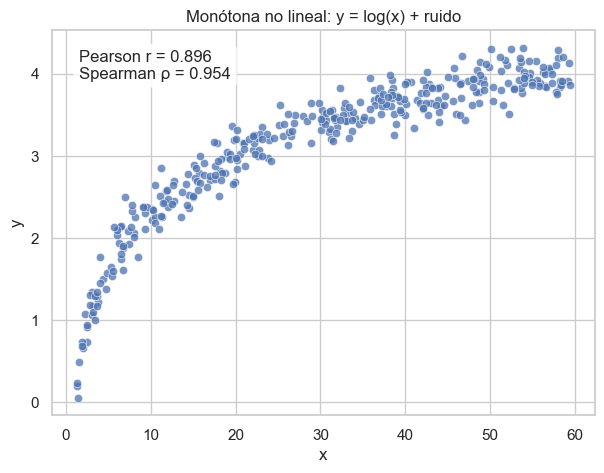


Caso B: y = x^2 + ruido (no monótona)
Pearson r   = -0.042 (p=4.28e-01)
Spearman ρ  = -0.031 (p=5.68e-01)


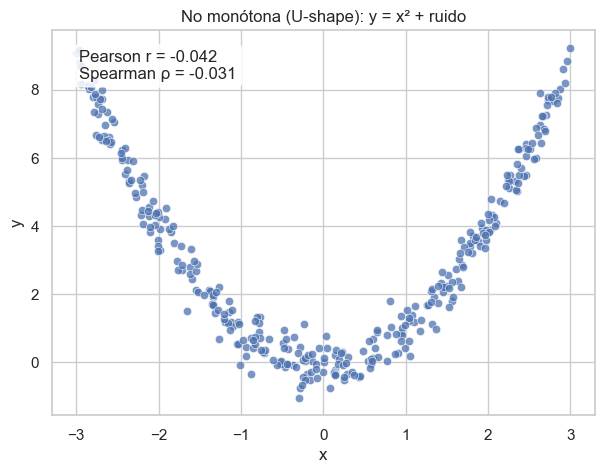

In [6]:
# =========================
# 1) DEMOSTRACIÓN SPEARMAN
# =========================
from scipy.stats import pearsonr, spearmanr

# --- Caso A: relación monótona NO lineal (Spearman suele ser más adecuado) ---
np.random.seed(42)
n = 350
x = np.random.uniform(1, 60, n)
y = np.log(x) + np.random.normal(0, 0.18, n)   # monótona creciente (curva)

r_p, p_p = pearsonr(x, y)
r_s, p_s = spearmanr(x, y)

print("Caso A: y = log(x) + ruido (monótona no lineal)")
print(f"Pearson r   = {r_p:.3f} (p={p_p:.2e})")
print(f"Spearman ρ  = {r_s:.3f} (p={p_s:.2e})")

plt.figure(figsize=(7, 5))
sns.scatterplot(x=x, y=y, alpha=0.75)
plt.title("Monótona no lineal: y = log(x) + ruido")
plt.xlabel("x")
plt.ylabel("y")
plt.text(
    0.05, 0.95,
    f"Pearson r = {r_p:.3f}\nSpearman ρ = {r_s:.3f}",
    transform=plt.gca().transAxes,
    ha="left", va="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.85)
)
plt.show()

# --- Caso B: relación NO monótona (U-shape) -> Pearson y Spearman pueden ser bajos ---
np.random.seed(7)
x2 = np.random.uniform(-3, 3, n)
y2 = x2**2 + np.random.normal(0, 0.4, n)       # U-shape, no monótona global

r_p2, p_p2 = pearsonr(x2, y2)
r_s2, p_s2 = spearmanr(x2, y2)

print("\nCaso B: y = x^2 + ruido (no monótona)")
print(f"Pearson r   = {r_p2:.3f} (p={p_p2:.2e})")
print(f"Spearman ρ  = {r_s2:.3f} (p={p_s2:.2e})")

plt.figure(figsize=(7, 5))
sns.scatterplot(x=x2, y=y2, alpha=0.75)
plt.title("No monótona (U-shape): y = x² + ruido")
plt.xlabel("x")
plt.ylabel("y")
plt.text(
    0.05, 0.95,
    f"Pearson r = {r_p2:.3f}\nSpearman ρ = {r_s2:.3f}",
    transform=plt.gca().transAxes,
    ha="left", va="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.85)
)
plt.show()


Point-biserial: smoker (Yes=1/No=0) vs tip
r_pb = 0.006 (p=0.927)


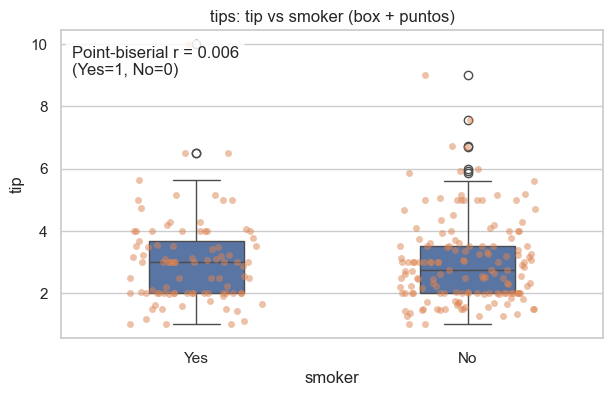

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27944\1355200304.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = tmp.groupby("smoker")["tip"].mean()


smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [5]:
# =========================
# DEMOSTRACIÓN PUNTO BISERIAL (Point-biserial)
#    Categórica binaria vs Numérica
# =========================
from scipy.stats import pointbiserialr

# Ejemplo 1: tips -> smoker (Yes/No) vs tip (numérica)
tmp = tips[["smoker", "tip"]].dropna().copy()

# Codificación explícita (para que el signo tenga sentido)
# 1 = Yes, 0 = No
tmp["smoker_bin"] = (tmp["smoker"] == "Yes").astype(int)

r_pb, p_pb = pointbiserialr(tmp["smoker_bin"], tmp["tip"])
print("Point-biserial: smoker (Yes=1/No=0) vs tip")
print(f"r_pb = {r_pb:.3f} (p={p_pb:.3f})")

# Visual 1: distribución por grupos (boxplot + stripplot)
plt.figure(figsize=(7, 4))
sns.boxplot(data=tmp, x="smoker", y="tip", width=0.35)
sns.stripplot(data=tmp, x="smoker", y="tip", jitter=0.25, alpha=0.5)
plt.title("tips: tip vs smoker (box + puntos)")
plt.xlabel("smoker")
plt.ylabel("tip")
plt.text(
    0.02, 0.95,
    f"Point-biserial r = {r_pb:.3f}\n(Yes=1, No=0)",
    transform=plt.gca().transAxes,
    ha="left", va="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.85)
)
plt.show()

# Visual 2: medias por grupo (útil para conectar con la intuición)
means = tmp.groupby("smoker")["tip"].mean()
display(means)


## Ejercicios prácticos
Utiliza alguno de los datasets ya provistos o alguno de tu preferencia.

In [ ]:
#Calcula los coeficientes de correlación (Pearson, Spearman) de variables numéricas

In [ ]:
# Crea una funcion para calcular los coeficientes de correlación (Pearson, Spearman) de variables numéricas

def plot_correlations():

In [ ]:
#Calcula el punto biserial para una variable categorica binaria vs una variable numerica

In [ ]:
# Crea una función para automatizar el proceso de calculo  del punto biserial
def plot_point_biserial(data, cat_col, num_col):
    ## Completa


## ✅ Hoy Aprendimos...

- **Pearson (r)** mide relación **lineal**; **Spearman (ρ)** mide relación **monótona** (por rangos).
- Spearman es mejor si hay **curva creciente/decreciente** u **outliers**; ambos pueden fallar en relaciones **no monótonas** (U-shape).
- **Point-biserial** sirve para **binaria vs numérica** y es equivalente a Pearson tras codificar la binaria **0/1**.
- Siempre validar con **gráficas** y **segmentación** (posibles confusores / Simpson).
